In [28]:
!pip install wheel

In [29]:
# Download OpenCV package which support python 3's
# Link : https://www.lfd.uci.edu/~gohlke/pythonlibs/
# 下載opencv_python-3.4.0-cp36-cp36m-win_amd64.whl版本

In [30]:
import pip
print(pip.pep425tags.get_supported())
# 確認格式
# 參考:https://www.cnblogs.com/nice-forever/p/5371906.html

[('cp36', 'cp36m', 'win_amd64'), ('cp36', 'none', 'win_amd64'), ('py3', 'none', 'win_amd64'), ('cp36', 'none', 'any'), ('cp3', 'none', 'any'), ('py36', 'none', 'any'), ('py3', 'none', 'any'), ('py35', 'none', 'any'), ('py34', 'none', 'any'), ('py33', 'none', 'any'), ('py32', 'none', 'any'), ('py31', 'none', 'any'), ('py30', 'none', 'any')]


In [31]:
!pip install C:/Users/Hao-Ping/Desktop/stock_crawler/opencv_python-3.4.0-cp36-cp36m-win_amd64.whl

In [32]:
!pip install matplotlib
import matplotlib.pyplot as plt
import cv2

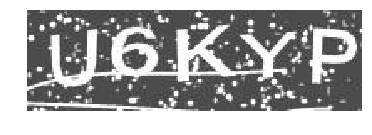

In [6]:
verification_image = cv2.imread("C:/Users/Hao-Ping/Desktop/stock_crawler/CaptchaImage.jpg")
plt.axis("off")
plt.imshow(verification_image)
plt.show()

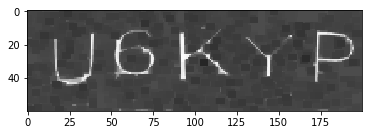

In [7]:
import numpy as np
# 超過440外沒有其他東西，視為無顏色
kernel = np.ones((4,5),np.uint8)
erosion = cv2.erode(verification_image, kernel, iterations = 1)
plt.imshow(erosion)
plt.show()


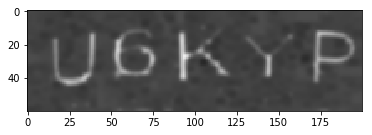

In [8]:
# 模糊(淡化奇怪的點)
blurred = cv2.GaussianBlur(erosion, (5,5),0)
plt.imshow(blurred)
plt.show()

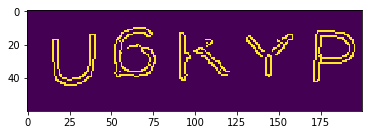

In [9]:
# 透過Canny演算法找出邊界
canny = cv2.Canny(blurred, 30,150)
plt.imshow(canny)
plt.show()

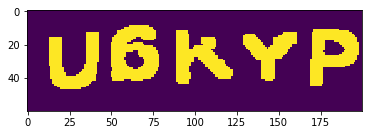

In [10]:
# 膨脹
dilation = cv2.dilate(canny, kernel, iterations = 1)
plt.imshow(dilation)
plt.show()

In [11]:
# 偵測輪廓
image, contours, hierarchy = cv2.findContours(dilation.copy(),cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
# BoundingRect，找出邊界x,y,寬,高
cnts = sorted([(c,cv2.boundingRect(c)[0])  for c in contours], key = lambda x:x[1])

array = []
for(c, _) in cnts:
    (x,y,w,h)=cv2.boundingRect(c)
    # 判斷寬高超過15才算一個字(不然會切太多)
    if w > 15 and h > 15:
        array.append((x,y,w,h))

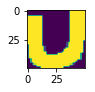

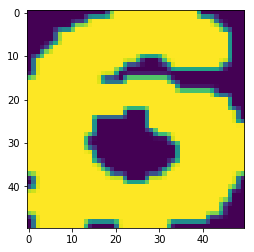

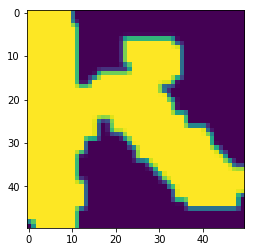

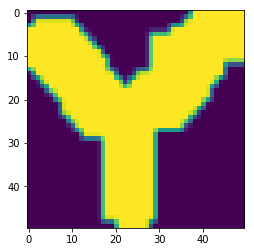

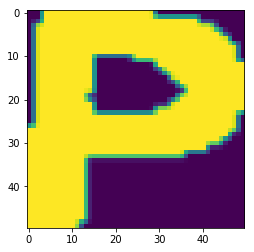

In [21]:
# 產生個別圖案
fig = plt.figure()
for id, (x,y,w,h) in enumerate(array):
    roi = dilation[y:y+h, x:x+w]
    thresh = roi.copy()
    a = fig.add_subplot(1, len(array), id+1)
    # 切成同樣大小(50,50)
    res = cv2.resize(thresh, (50,50))
    plt.imshow(res)
    plt.show()
    # 存檔
    cv2.imwrite("{}.png".format(id),res)